In [1]:
'''
Detecting Data Fraud Case Study
'''
# import json
# import os
# print(os.getcwd())
# with open('/home/david/Documents/temp/data.json') as j:
#     jdata = json.loads(j.read())

'\nDetecting Data Fraud Case Study\n'

In [2]:
# jstr = json.dumps(jdata
#                   , indent = 2
#                  )


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_json('/home/david/Documents/temp/data.json')
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [5]:
df.acct_type.value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [6]:
#df.info()

In [7]:
df['fraud'] = np.where((df.acct_type == 'fraudster_event')
                       | (df.acct_type == 'fraudster')
                       | (df.acct_type == 'fraudster_att')
                       , 1
                       , 0
                      )
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,0
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0


In [8]:
df.shape

(14337, 45)

In [9]:
df.fraud.value_counts()

0    13044
1     1293
Name: fraud, dtype: int64

In [10]:
df_fraud = df[df.fraud == 1]
df_fraud.shape

(1293, 45)

In [11]:
df_true = df[df.fraud != 1]
df_true.shape

(13044, 45)

In [12]:
# Check for Benford's distribution
body_lengths_true = df_true.body_length.values
int(str(body_lengths_true[1])[0])

2

In [13]:
body_lengths_true_first = [int(str(x)[0]) for x in body_lengths_true]

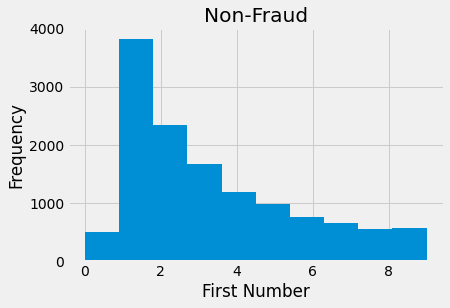

In [14]:
plt.hist(body_lengths_true_first)
plt.ylabel('Frequency')
plt.xlabel('First Number')
plt.title('Non-Fraud');

In [15]:
body_lengths_fraud = df_fraud.body_length.values
body_lengths_fraud_first = [int(str(x)[0]) for x in body_lengths_fraud]

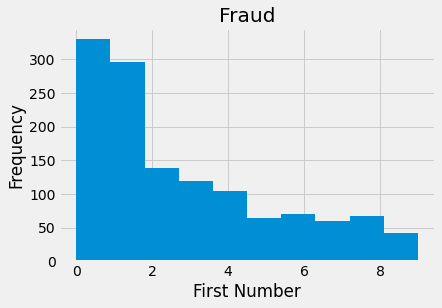

In [16]:
plt.hist(body_lengths_fraud_first)
plt.ylabel('Frequency')
plt.xlabel('First Number')
plt.title('Fraud');